# **Import Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

Load Dataset

In [41]:
data = pd.read_excel('Online Retail.xlsx')

Explore Dataset

In [42]:
data.info()
data.head()
data.isnull().sum()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


Data Cleaning

In [43]:
data.dropna(subset=['Description', 'CustomerID'], inplace=True)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.drop_duplicates(inplace=True)
data = data[data['Quantity'] > 0]

Create New Features

In [44]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# **Exploratory Data Analysis**

Key Metrics

In [45]:
total_revenue = data['TotalAmount'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 8887208.894000003


Top Products by Quantity

In [46]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Products by Quantity:")
print(top_products)

Top Products by Quantity:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


Sales by Country

In [47]:
country_sales = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
print("Sales by Country:")
print(country_sales)

Sales by Country:
Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Un

Time-Series Analysis

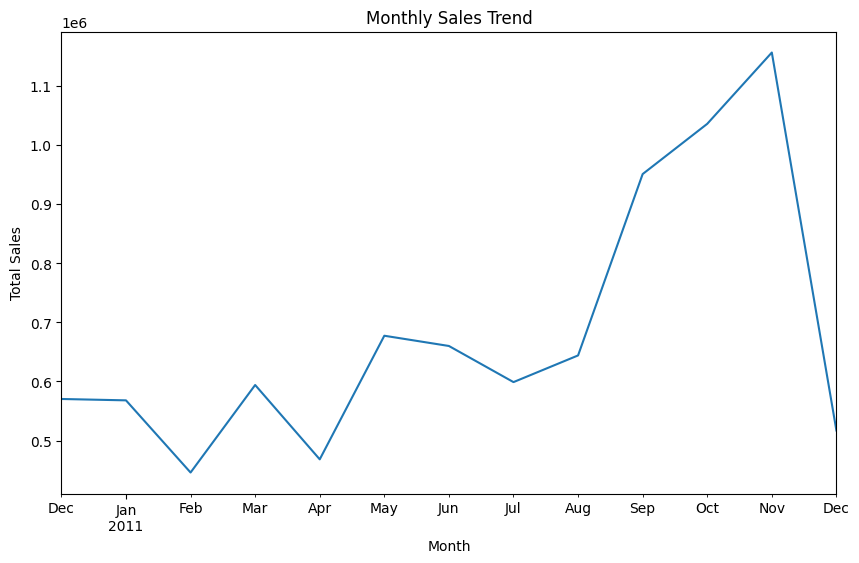

In [48]:
monthly_sales = data.groupby('YearMonth')['TotalAmount'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Customer Analysis

Top Customers by Revenue

In [49]:
top_customers = data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
print("Top Customers by Revenue:")
print(top_customers)

Top Customers by Revenue:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalAmount, dtype: float64


RFM Analysis

In [50]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print("RFM Analysis:")
print(rfm.head())

RFM Analysis:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1        182   4310.00
12348.0          74         31   1797.24
12349.0          18         73   1757.55
12350.0         309         17    334.40


# Product Performance

Top Products by Revenue

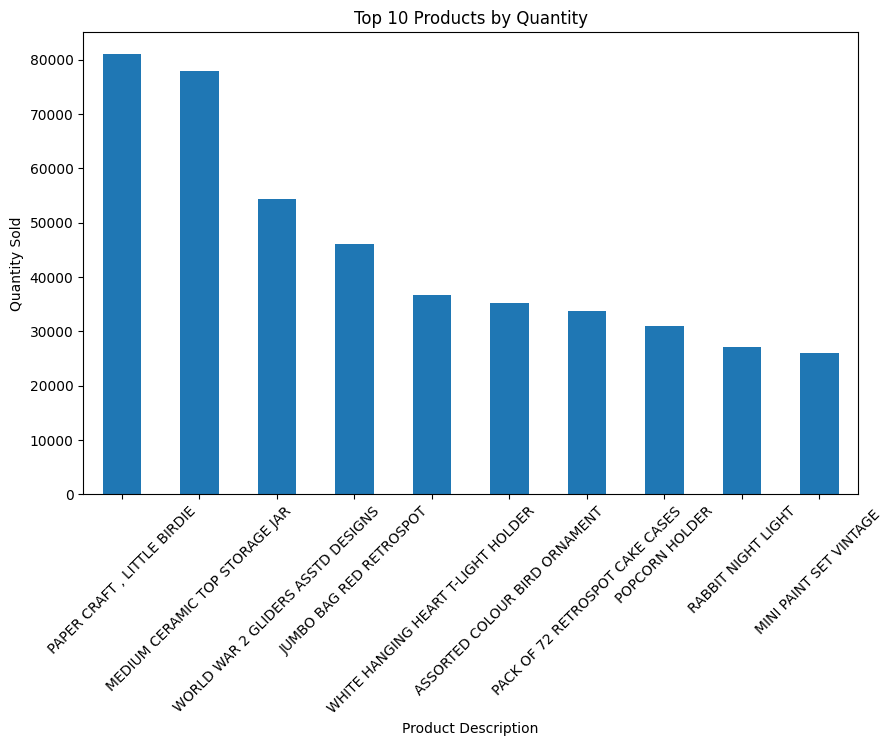

In [51]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', title='Top 10 Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

Heatmap for Correlation

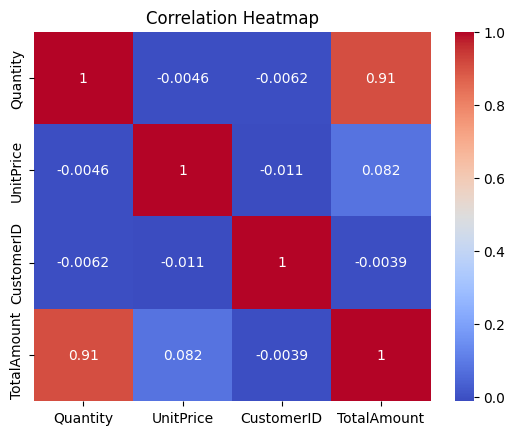

In [52]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Underperforming Areas

Products with Low Sales

In [53]:
low_performers = data.groupby('Description')['TotalAmount'].sum().sort_values().head(10)
print("Underperforming Products:")
print(low_performers)

Underperforming Products:
Description
PADS TO MATCH ALL CUSHIONS             0.003
HEN HOUSE W CHICK IN NEST              0.420
SET 12 COLOURING PENCILS DOILEY        0.650
VINTAGE BLUE TINSEL REEL               0.840
PURPLE FRANGIPANI HAIRCLIP             0.850
PINK CRYSTAL GUITAR PHONE CHARM        0.850
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
CAT WITH SUNGLASSES BLANK CARD         0.950
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
BLACKCHRISTMAS TREE 30CM               1.250
Name: TotalAmount, dtype: float64


Countries with Low Sales

In [56]:
low_sales_countries = data.groupby('Country')['TotalAmount'].sum().sort_values().head(5)
print("Countries with Lowest Sales:")
print(low_sales_countries)


Countries with Lowest Sales:
Country
Saudi Arabia       145.92
Bahrain            548.40
Czech Republic     826.74
RSA               1002.31
Brazil            1143.60
Name: TotalAmount, dtype: float64


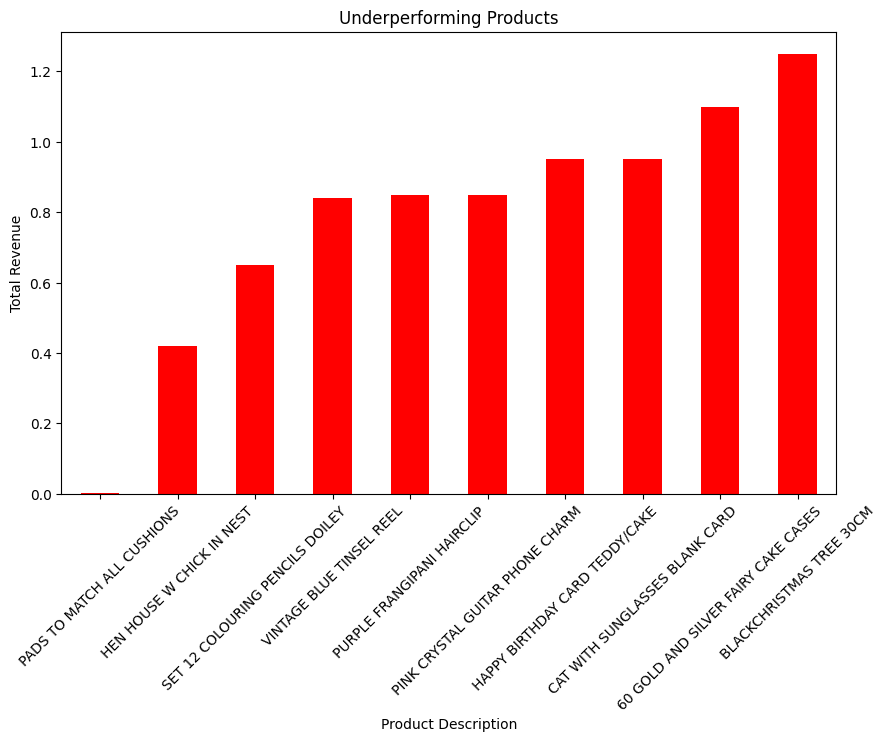

In [57]:
plt.figure(figsize=(10, 6))
low_performers.plot(kind='bar', title='Underperforming Products', color='red')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# **Predictive Analysis (ARIMA Forecasting)**

Fit ARIMA Model

In [58]:
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

Forecast Next 12 Months

In [59]:
forecast = model_fit.forecast(steps=12)
print("Sales Forecast for Next 12 Months:")
print(forecast)

Sales Forecast for Next 12 Months:
2012-01    637652.843918
2012-02    680753.788605
2012-03    696175.126487
2012-04    701692.816733
2012-05    703667.023243
2012-06    704373.386082
2012-07    704626.119754
2012-08    704716.546805
2012-09    704748.901227
2012-10    704760.477503
2012-11    704764.619447
2012-12    704766.101417
Freq: M, Name: predicted_mean, dtype: float64


Plot Forecast

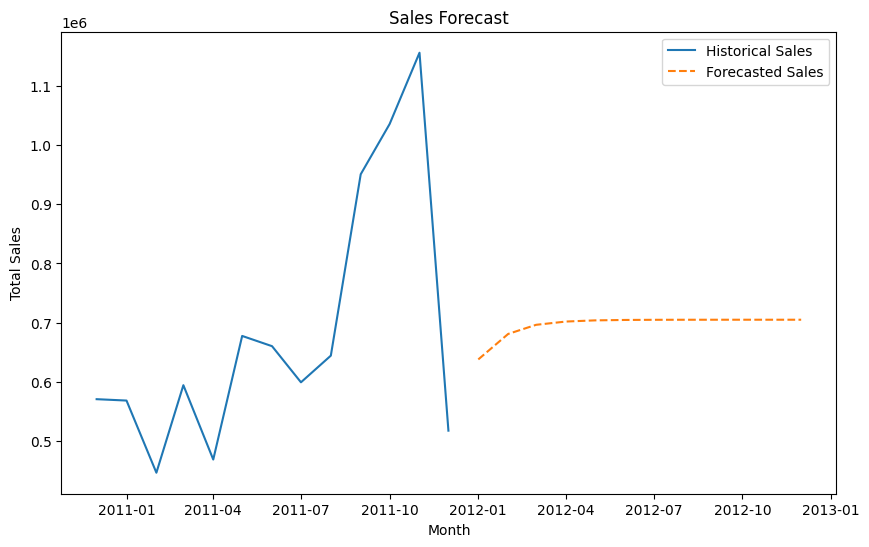

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values, label='Historical Sales')
plt.plot(forecast.index.to_timestamp(), forecast.values, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Thank you